In [162]:
var openDigger = require('../src/open_digger');
var query = openDigger.driver.clickhouse.query;

var repo_id = '268027';
var repo_name = 'carhartl/jquery-cookie';

In [163]:
//起始和终止年份、月份
var start_year = 2015, end_year = 2020;
var start_month = 1, end_month = 12;

var years_amount = end_year - start_year + 1;
var months_per_year = 12;
var months_amount = years_amount * months_per_year;

//构建 year_month 数组
var year_months = Array();
for(let year = start_year; year <= end_year; year++)
{
    for (let month = start_month; month <= end_month; month++)
    {
        year_months.push({'year': year, 'month': month});
    }
}
//坐标图的横坐标
year_month_axis = year_months.map(year_month => year_month['year'].toString() + '-' + year_month['month'].toString())

[
  '2015-1',  '2015-2',  '2015-3',  '2015-4',  '2015-5',
  '2015-6',  '2015-7',  '2015-8',  '2015-9',  '2015-10',
  '2015-11', '2015-12', '2016-1',  '2016-2',  '2016-3',
  '2016-4',  '2016-5',  '2016-6',  '2016-7',  '2016-8',
  '2016-9',  '2016-10', '2016-11', '2016-12', '2017-1',
  '2017-2',  '2017-3',  '2017-4',  '2017-5',  '2017-6',
  '2017-7',  '2017-8',  '2017-9',  '2017-10', '2017-11',
  '2017-12', '2018-1',  '2018-2',  '2018-3',  '2018-4',
  '2018-5',  '2018-6',  '2018-7',  '2018-8',  '2018-9',
  '2018-10', '2018-11', '2018-12', '2019-1',  '2019-2',
  '2019-3',  '2019-4',  '2019-5',  '2019-6',  '2019-7',
  '2019-8',  '2019-9',  '2019-10', '2019-11', '2019-12',
  '2020-1',  '2020-2',  '2020-3',  '2020-4',  '2020-5',
  '2020-6',  '2020-7',  '2020-8',  '2020-9',  '2020-10',
  '2020-11', '2020-12'
]

In [164]:
//每月star增加的数量
var stars_per_month = [];
stars_per_month.length = months_amount;

for(let year = start_year; year <= end_year; year++)
{
    for(let month = start_month; month <= end_month; month++)
    {
        query
        (    
            `
            SELECT
                formatDateTime(created_date,'%Y-%m') year_month,
                count(*) as stars
            FROM
                github_log.year${year}
            WHERE
                repo_id = ${repo_id}
                    and type = 'WatchEvent'
                    and toMonth(created_date) = ${month}
            GROUP BY
                year_month
            `
        )
        .then
        (
            res =>
            {
                stars_per_month[(year - start_year) * 12 + month] = res[0].stars;
            }
        );
    }
}

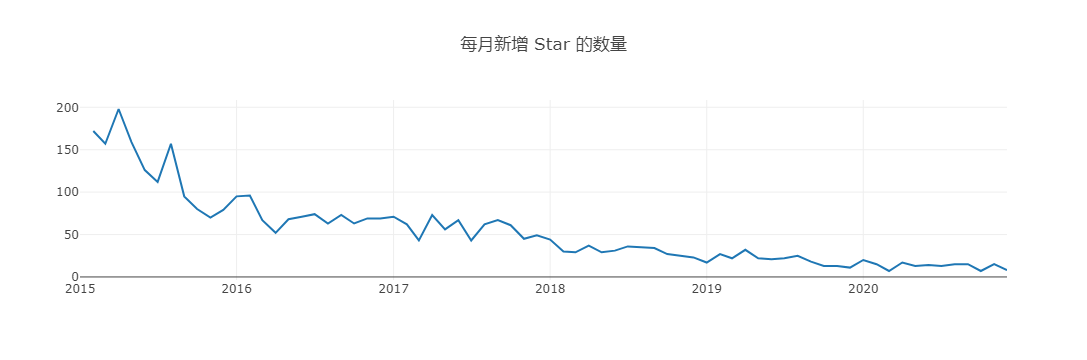

In [165]:
openDigger.render.plotly(
    [
        {x: year_month_axis, y: stars_per_month, mode: 'scatter', name: 'star 数量'}
    ],
    {
        title: '每月新增 Star 的数量'
    }
)

In [166]:
//每月fork增加的数量
var forks_per_month = [];
forks_per_month.length = months_amount;

for(let year = start_year; year <= end_year; year++)
{
    for(let month = start_month; month <= end_month; month++)
    {
        query
        (    
            `
            SELECT
                formatDateTime(created_date,'%Y-%m') year_month,
                count(*) as forks
            FROM
                github_log.year${year}
            WHERE
                repo_id = ${repo_id}
                    and type = 'ForkEvent'
                    and toMonth(created_date) = ${month}
            GROUP BY
                year_month
            `
        )
        .then
        (
            res =>
            {
                forks_per_month[(year - start_year) * 12 + month] = res[0].forks;
            }
        );
    }
}

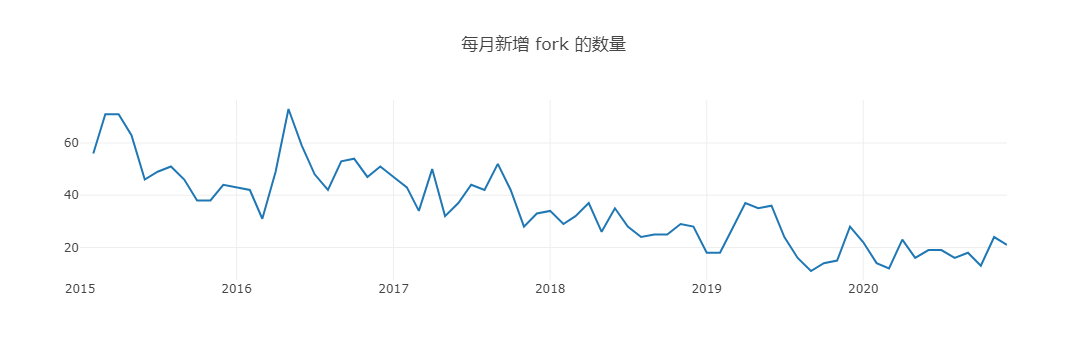

In [167]:
openDigger.render.plotly(
    [
        {x: year_month_axis, y: forks_per_month, mode: 'scatter', name: 'fork 数量'}
    ],
    {
        title: '每月新增 fork 的数量'
    }
)

In [168]:
//每月star和fork新增数量表格
var table_stars_forks = []

for(let index = 0; index < year_month_axis.length; index++)
{
    table_stars_forks.push(
        {'year_month': year_month_axis[index],
         'stars': stars_per_month[index + 1],
         'forks': forks_per_month[index + 1]}
    );
}

console.table(
    table_stars_forks.map(
        (data) => {
            return {
                '年-月': data.year_month,
                '新增star': data.stars,
                '新增fork': data.forks
            }
        }
    )
)


┌─────────┬───────────┬──────────┬──────────┐
│ (index) │   年-月   │ 新增star │ 新增fork │
├─────────┼───────────┼──────────┼──────────┤
│    0    │ '2015-1'  │  '172'   │   '56'   │
│    1    │ '2015-2'  │  '157'   │   '71'   │
│    2    │ '2015-3'  │  '198'   │   '71'   │
│    3    │ '2015-4'  │  '159'   │   '63'   │
│    4    │ '2015-5'  │  '126'   │   '46'   │
│    5    │ '2015-6'  │  '112'   │   '49'   │
│    6    │ '2015-7'  │  '157'   │   '51'   │
│    7    │ '2015-8'  │   '95'   │   '46'   │
│    8    │ '2015-9'  │   '80'   │   '38'   │
│    9    │ '2015-10' │   '70'   │   '38'   │
│   10    │ '2015-11' │   '79'   │   '44'   │
│   11    │ '2015-12' │   '95'   │   '43'   │
│   12    │ '2016-1'  │   '96'   │   '42'   │
│   13    │ '2016-2'  │   '67'   │   '31'   │
│   14    │ '2016-3'  │   '52'   │   '49'   │
│   15    │ '2016-4'  │   '68'   │   '73'   │
│   16    │ '2016-5'  │   '71'   │   '59'   │
│   17    │ '2016-6'  │   '74'   │   '48'   │
│   18    │ '2016-7'  │   '63'   │   '42

In [169]:
//每月打开issue的数量
var issues_open_per_month = [];
issues_open_per_month.length = months_amount;

for(let year = start_year; year <= end_year; year++)
{
    for(let month = start_month; month <= end_month; month++)
    {
        query
        (    
            `
            SELECT
                count(*) as issues_open
            FROM
                github_log.year${year}
            WHERE
                repo_id = ${repo_id}
                    and type = 'IssuesEvent'
                    and (action = 'opened' or action = 'reopened')
                    and toMonth(created_date) = ${month}
            `
        )
        .then
        (
            res =>
            {
                issues_open_per_month[(year - start_year) * 12 + month] = res[0].issues_open;
            }
        );
    }
}

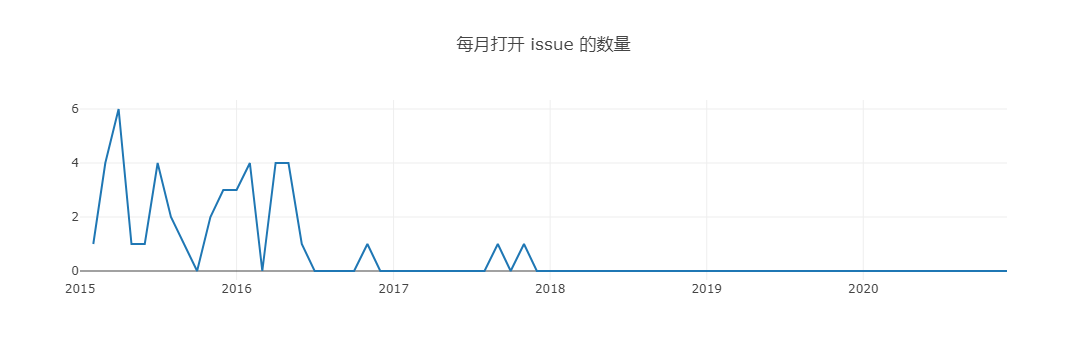

In [170]:
openDigger.render.plotly(
    [
        {x: year_month_axis, y: issues_open_per_month, mode: 'scatter', name: 'issue 数量'}
    ],
    {
        title: '每月打开 issue 的数量'
    }
)

In [171]:
//每月关闭issue的数量
var issues_close_per_month = [];
issues_close_per_month.length = months_amount;

for(let year = start_year; year <= end_year; year++)
{
    for(let month = start_month; month <= end_month; month++)
    {
        query
        (    
            `
            SELECT
                count(*) as issues_close
            FROM
                github_log.year${year}
            WHERE
                repo_id = ${repo_id}
                    and type = 'IssuesEvent'
                    and action = 'closed'
                    and toMonth(created_date) = ${month}
            `
        )
        .then
        (
            res =>
            {
                issues_close_per_month[(year - start_year) * 12 + month] = res[0].issues_close;
            }
        );
    }
}

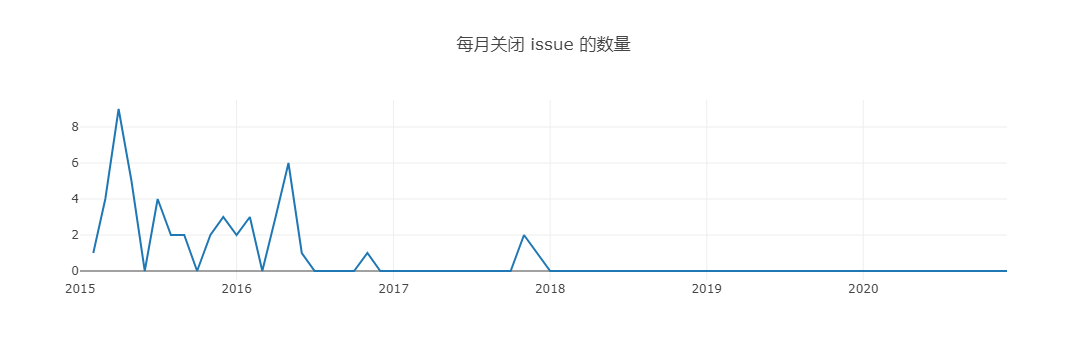

In [172]:
openDigger.render.plotly(
    [
        {x: year_month_axis, y: issues_close_per_month, mode: 'scatter', name: 'issue 数量'}
    ],
    {
        title: '每月关闭 issue 的数量'
    }
)

In [173]:
//每月打开、关闭issue数量统计表
var table_issues_open_close = []

for(let index = 0; index < year_month_axis.length; index++)
{
    table_issues_open_close.push(
        {'year_month': year_month_axis[index],
         'open': issues_open_per_month[index + 1],
         'close': issues_close_per_month[index + 1]}
    );
}

console.table(
    table_issues_open_close.map(
        (data) => {
            return {
                '年-月': data.year_month,
                '打开issue': data.open,
                '关闭issue': data.close
            }
        }
    )
)

┌─────────┬───────────┬───────────┬───────────┐
│ (index) │   年-月   │ 打开issue │ 关闭issue │
├─────────┼───────────┼───────────┼───────────┤
│    0    │ '2015-1'  │    '1'    │    '1'    │
│    1    │ '2015-2'  │    '4'    │    '4'    │
│    2    │ '2015-3'  │    '6'    │    '9'    │
│    3    │ '2015-4'  │    '1'    │    '5'    │
│    4    │ '2015-5'  │    '1'    │    '0'    │
│    5    │ '2015-6'  │    '4'    │    '4'    │
│    6    │ '2015-7'  │    '2'    │    '2'    │
│    7    │ '2015-8'  │    '1'    │    '2'    │
│    8    │ '2015-9'  │    '0'    │    '0'    │
│    9    │ '2015-10' │    '2'    │    '2'    │
│   10    │ '2015-11' │    '3'    │    '3'    │
│   11    │ '2015-12' │    '3'    │    '2'    │
│   12    │ '2016-1'  │    '4'    │    '3'    │
│   13    │ '2016-2'  │    '0'    │    '0'    │
│   14    │ '2016-3'  │    '4'    │    '3'    │
│   15    │ '2016-4'  │    '4'    │    '6'    │
│   16    │ '2016-5'  │    '1'    │    '1'    │
│   17    │ '2016-6'  │    '0'    │    '0'    

In [174]:
//每月打开 Pull Request 的数量
var pull_request_open_per_month = [];
pull_request_open_per_month.length = months_amount;

for(let year = start_year; year <= end_year; year++)
{
    for(let month = start_month; month <= end_month; month++)
    {
        query
        (
            `
            SELECT
                count(*) pull_request_open
            FROM
                github_log.year${year}
            WHERE
                repo_id = ${id}
                    and type = 'PullRequestEvent'
                    and action = 'opened'
                    and toMonth(created_date) = ${month}
            `
        )
        .then
        (
            res => 
            {
                pull_request_open_per_month[(year - start_year) * 12 + month] = res[0].pull_request_open;
            }
        );
    }
}

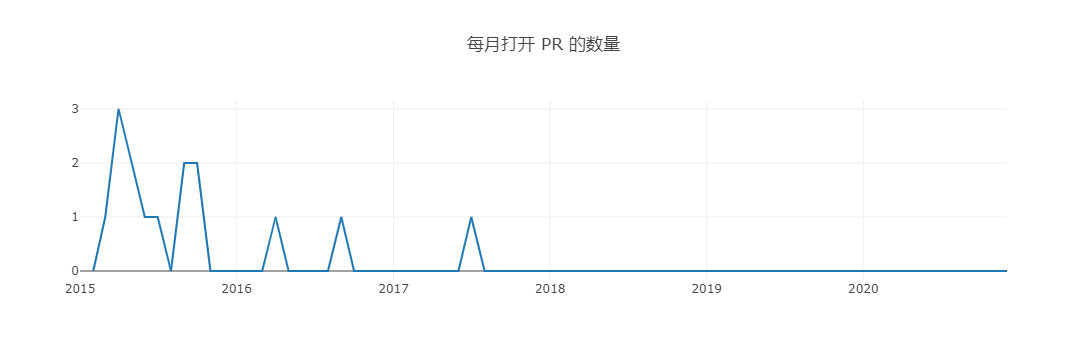

In [175]:
openDigger.render.plotly(
    [
        {x: year_month_axis, y: pull_request_open_per_month, mode: 'scatter', name: 'PR 打开数量'}
    ],
    {
        title: '每月打开 PR 的数量'
    }
)

In [176]:
//每月合并 Pull Request 的数量
var pull_request_merged_per_month = [];
pull_request_merged_per_month.length = months_amount;

for(let year = start_year; year <= end_year; year++)
{
    for(let month = start_month; month <= end_month; month++)
    {
        query
        (
            `
            SELECT
                count(*) pull_request_merged
            FROM
                github_log.year${year}
            WHERE
                repo_id = ${id}
                    and type = 'PullRequestEvent'
                    and action = 'closed'
                    and pull_merged_by_id != 0
                    and toMonth(created_date) = ${month}
            `
        )
        .then
        (
            res => 
            {
                pull_request_merged_per_month[(year - start_year) * 12 + month] = res[0].pull_request_merged;
            }
        );
    }
}

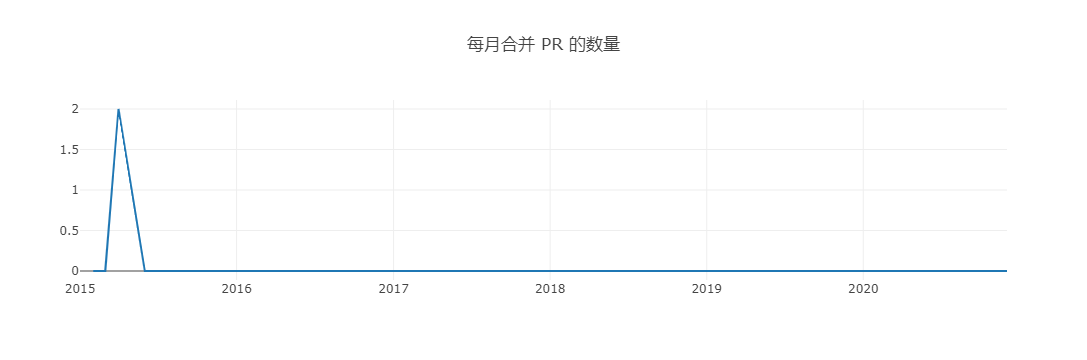

In [177]:
openDigger.render.plotly(
    [
        {x: year_month_axis,
         y: pull_request_merged_per_month,
         mode: 'scatter',
         name: 'PR 合并数量'}
    ],
    {
        title: '每月合并 PR 的数量'
    }
)

In [178]:
//每月打开、合并pull request的数量统计表
var table_prs_open_merge = []

for(let index = 0; index < year_month_axis.length; index++)
{
    table_prs_open_merge.push(
        {'year_month': year_month_axis[index],
         'open': pull_request_open_per_month[index + 1],
         'merge': pull_request_merged_per_month[index + 1]}
    );
}

console.table(
    table_prs_open_merge.map(
        (data) => {
            return {
                '年-月': data.year_month,
                '打开Pull Request': data.open,
                '合并Pull Request': data.merge
            }
        }
    )
)

┌─────────┬───────────┬──────────────────┬──────────────────┐
│ (index) │   年-月   │ 打开Pull Request │ 合并Pull Request │
├─────────┼───────────┼──────────────────┼──────────────────┤
│    0    │ '2015-1'  │       '0'        │       '0'        │
│    1    │ '2015-2'  │       '1'        │       '0'        │
│    2    │ '2015-3'  │       '3'        │       '2'        │
│    3    │ '2015-4'  │       '2'        │       '1'        │
│    4    │ '2015-5'  │       '1'        │       '0'        │
│    5    │ '2015-6'  │       '1'        │       '0'        │
│    6    │ '2015-7'  │       '0'        │       '0'        │
│    7    │ '2015-8'  │       '2'        │       '0'        │
│    8    │ '2015-9'  │       '2'        │       '0'        │
│    9    │ '2015-10' │       '0'        │       '0'        │
│   10    │ '2015-11' │       '0'        │       '0'        │
│   11    │ '2015-12' │       '0'        │       '0'        │
│   12    │ '2016-1'  │       '0'        │       '0'        │
│   13    │ '2

In [179]:
//每月在仓库中活跃的不同开发者数量
var active_developer_per_month = [];
active_developer_per_month.length = months_amount;

for(let year = start_year; year <= end_year; year++)
{
    for(let month = start_month; month <= end_month; month++)
    {
        query
        (
            `
            SELECT
                COUNT(DISTINCT actor_id) as active_developer_num
            FROM 
                github_log.year${year}
            WHERE 
                repo_id = ${id}
                    and toMonth(created_date) = ${month}
            `
        )
        .then
        (
            res => 
            {
                active_developer_per_month[(year - start_year) * 12 + month] = res[0].active_developer_num;
            }
        );
    }
}

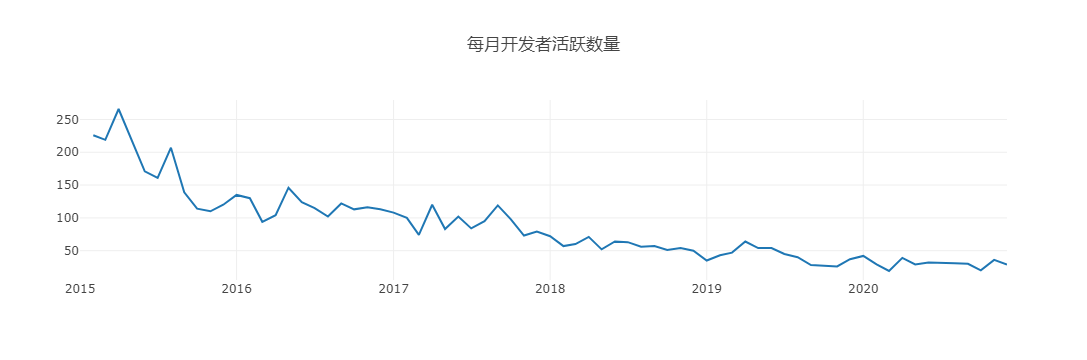

In [180]:
openDigger.render.plotly(
    [
        {x: year_month_axis,
         y: active_developer_per_month,
         mode: 'scatter',
         name: '开发者活跃数量'}
    ],
    {
        title: '每月开发者活跃数量'
    }
)

In [181]:
//每月活跃用户的统计表
var table_active_developer = []

for(let index = 0; index < year_month_axis.length; index++)
{
    table_active_developer.push(
        {'year_month': year_month_axis[index],
         'active_developer': active_developer_per_month[index + 1]}
    );
}

console.table(
    table_active_developer.map(
        (data) => {
            return {
                '年-月': data.year_month,
                '活跃人数': data.active_developer
            }
        }
    )
)

┌─────────┬───────────┬──────────┐
│ (index) │   年-月   │ 活跃人数 │
├─────────┼───────────┼──────────┤
│    0    │ '2015-1'  │  '226'   │
│    1    │ '2015-2'  │  '219'   │
│    2    │ '2015-3'  │  '266'   │
│    3    │ '2015-4'  │  '220'   │
│    4    │ '2015-5'  │  '171'   │
│    5    │ '2015-6'  │  '161'   │
│    6    │ '2015-7'  │  '207'   │
│    7    │ '2015-8'  │  '139'   │
│    8    │ '2015-9'  │  '114'   │
│    9    │ '2015-10' │  '110'   │
│   10    │ '2015-11' │  '120'   │
│   11    │ '2015-12' │  '135'   │
│   12    │ '2016-1'  │  '130'   │
│   13    │ '2016-2'  │   '94'   │
│   14    │ '2016-3'  │  '104'   │
│   15    │ '2016-4'  │  '146'   │
│   16    │ '2016-5'  │  '124'   │
│   17    │ '2016-6'  │  '115'   │
│   18    │ '2016-7'  │  '102'   │
│   19    │ '2016-8'  │  '122'   │
│   20    │ '2016-9'  │  '113'   │
│   21    │ '2016-10' │  '116'   │
│   22    │ '2016-11' │  '113'   │
│   23    │ '2016-12' │  '108'   │
│   24    │ '2017-1'  │  '100'   │
│   25    │ '2017-2'  │   

In [182]:
//issue从打开到关闭的平均时长和中位数时长（单位：天）
query
(
    `
    SELECT
        AVG(opened_time) as avg_opened_time,
        quantile(0.5)(opened_time) as medium_opened_time
    FROM 
        (
        SELECT repo_id, type, action, (toRelativeDayNum(issue_closed_at) - toRelativeDayNum(issue_created_at)) as opened_time FROM github_log.year2015
            UNION ALL
        SELECT repo_id, type, action, (toRelativeDayNum(issue_closed_at) - toRelativeDayNum(issue_created_at)) as opened_time FROM github_log.year2016
            UNION ALL
        SELECT repo_id, type, action, (toRelativeDayNum(issue_closed_at) - toRelativeDayNum(issue_created_at)) as opened_time FROM github_log.year2017
            UNION ALL
        SELECT repo_id, type, action, (toRelativeDayNum(issue_closed_at) - toRelativeDayNum(issue_created_at)) as opened_time FROM github_log.year2018
            UNION ALL
        SELECT repo_id, type, action, (toRelativeDayNum(issue_closed_at) - toRelativeDayNum(issue_created_at)) as opened_time FROM github_log.year2019
            UNION ALL
        SELECT repo_id, type, action, (toRelativeDayNum(issue_closed_at) - toRelativeDayNum(issue_created_at)) as opened_time FROM github_log.year2020
        )
    WHERE 
            repo_id = ${repo_id}
        and type = 'IssuesEvent'
        and action = 'closed'
    `
)
.then
(
    res => 
    {
        console.log(res);
    }
);

[ { avg_opened_time: 52.96078431372549, medium_opened_time: 1 } ]


In [183]:
//PR从打开到合并的平均时长和中位数时长（单位：天）
query
(
    `
    SELECT
        AVG(opened_time) as avg_opened_time,
        quantile(0.5)(opened_time) as medium_opened_time
    FROM
        (
            SELECT
                toRelativeDayNum(max(created_at)) - toRelativeDayNum(min(created_at)) as opened_time
            FROM 
                (
                SELECT repo_id, type, created_at, issue_id FROM github_log.year2015
                    UNION ALL
                SELECT repo_id, type, created_at, issue_id FROM github_log.year2016
                    UNION ALL
                SELECT repo_id, type, created_at, issue_id FROM github_log.year2017
                    UNION ALL
                SELECT repo_id, type, created_at, issue_id FROM github_log.year2018
                    UNION ALL
                SELECT repo_id, type, created_at, issue_id FROM github_log.year2019
                    UNION ALL
                SELECT repo_id, type, created_at, issue_id FROM github_log.year2020
                )
            WHERE 
                    repo_id = ${repo_id}
                and type = 'PullRequestEvent'
            GROUP BY 
                issue_id
            HAVING
                COUNT(*) = 2
        )
    `
)
.then
(
    res => 
    {
        console.log(res);
    }
);

[ { avg_opened_time: 9.357142857142858, medium_opened_time: 1 } ]


In [184]:
//issue和PR从打开第一次有人回复（非本人回复）的平均时长和中位数时长（单位：天）
query
(
    `
    SELECT
        AVG(time) as avg_time,
        quantile(0.5)(time) as medium_time,
        COUNT(*) count
    FROM
        ((
            SELECT
                issue_id,
                MIN(toRelativeDayNum(issue_comment_created_at) - toRelativeDayNum(issue_created_at)) as time
            FROM 
                (
                SELECT repo_id, type, action, issue_id, issue_created_at, issue_comment_created_at, issue_comment_author_id, issue_author_id FROM github_log.year2015
                    UNION ALL
                SELECT repo_id, type, action, issue_id, issue_created_at, issue_comment_created_at, issue_comment_author_id, issue_author_id FROM github_log.year2016
                    UNION ALL
                SELECT repo_id, type, action, issue_id, issue_created_at, issue_comment_created_at, issue_comment_author_id, issue_author_id FROM github_log.year2017
                    UNION ALL
                SELECT repo_id, type, action, issue_id, issue_created_at, issue_comment_created_at, issue_comment_author_id, issue_author_id FROM github_log.year2018
                    UNION ALL
                SELECT repo_id, type, action, issue_id, issue_created_at, issue_comment_created_at, issue_comment_author_id, issue_author_id FROM github_log.year2019
                    UNION ALL
                SELECT repo_id, type, action, issue_id, issue_created_at, issue_comment_created_at, issue_comment_author_id, issue_author_id FROM github_log.year2020
                )
            WHERE 
                    repo_id = ${repo_id}
                and type = 'IssueCommentEvent'
                and action = 'created'
                and issue_comment_author_id != issue_author_id
            GROUP BY
                issue_id
        )
        UNION ALL
        (
            SELECT
                issue_id,
                MIN(toRelativeDayNum(created_at) - toRelativeDayNum(issue_created_at)) as time
            FROM 
                (
                SELECT repo_id, type, action, issue_id, issue_created_at, created_at, issue_author_login, pull_requested_reviewer_login FROM github_log.year2015
                    UNION ALL
                SELECT repo_id, type, action, issue_id, issue_created_at, created_at, issue_author_login, pull_requested_reviewer_login FROM github_log.year2016
                    UNION ALL
                SELECT repo_id, type, action, issue_id, issue_created_at, created_at, issue_author_login, pull_requested_reviewer_login FROM github_log.year2017
                    UNION ALL
                SELECT repo_id, type, action, issue_id, issue_created_at, created_at, issue_author_login, pull_requested_reviewer_login FROM github_log.year2018
                    UNION ALL
                SELECT repo_id, type, action, issue_id, issue_created_at, created_at, issue_author_login, pull_requested_reviewer_login FROM github_log.year2019
                    UNION ALL
                SELECT repo_id, type, action, issue_id, issue_created_at, created_at, issue_author_login, pull_requested_reviewer_login FROM github_log.year2020
                )
            WHERE 
                    repo_id = ${repo_id}
                and type = 'PullRequestReviewEvent'
                and action = 'created'
                and issue_author_login != pull_requested_reviewer_login
            GROUP BY
                issue_id
        ))
    `
)
.then
(
    res => 
    {
        console.log(res);
    }
);

[ { avg_time: 114.58333333333333, medium_time: 0, count: '72' } ]


In [ ]:
//个人认为关键或值得注意的时间节点
/*   
    在项目于14年release1.0版本后，项目得到了较多的关注，月均star的数量在150左右，fork的数量在60上下。
    但是在15年9月，项目star的月均数量开始显著下滑，降至100以下。从此之后，项目的star月增量持续减少。
    于此同时，fork的数量还能保持稳定，时钟保持50上下的月均fork数。直到17年，项目fork数开始显著下滑至40上下。
    直到17年末项目归档，项目的各项指标出现了明显的下降。
*/